In [7]:
import os
import numpy as np
import pandas as pd

In [8]:
import re

In [9]:
import nltk

In [10]:
from nltk.corpus import framenet as fn

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [13]:
import seaborn as sns

In [25]:
from tqdm.notebook import tqdm

In [611]:
from nltk import ngrams

In [428]:
from importlib import reload

In [430]:
import sys

In [750]:
import fca_interp as fcai
import abstract_context
import pattern_structure

In [14]:
def get_frames_from_txt(txt, count_thold=None):
    ws = re.split('\s', txt)
    frs = [fr['ID'] for w in ws for fr in fn.frames_by_lemma(porter.stem(w))]
    frs = pd.Series(frs).value_counts()
    if count_thold is not None:
        frs = frs[frs>=count_thold]
    frs = [fn.frame_by_id(fr)['name'] for fr in frs.index]
    return frs

In [15]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


In [2]:
DATA_DIR = os.path.abspath('../../data/stanfordSentimentTreebank/')

In [4]:
train_ds = pd.read_csv(DATA_DIR+'/imdb_train_with_preds.csv', index_col=0)
print(train_ds.shape)
train_ds.head()

(25000, 772)


,sentiment,text,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,...,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,sentiment_bin,prediction
0,pos,"Since Educating Rita, Julie Walters has been o...",-0.217232,-0.278537,0.024592,-0.190077,0.338728,0.198379,0.155497,0.505957,...,-0.048404,-0.267151,-0.375385,-0.221558,0.410194,-0.030859,0.250553,0.060898,True,True
1,pos,This is one of the best movies out there and t...,-0.052009,-0.275612,0.290984,0.037968,0.363718,0.050480,0.126078,0.849306,...,0.008719,-0.378950,-0.302224,0.030559,0.274638,-0.174276,0.252467,-0.049769,True,True
2,pos,Dumland focuses on the lives of one (American?...,-0.169023,-0.005889,0.382560,-0.115467,0.296713,0.063204,0.051784,0.567073,...,0.170062,-0.453052,-0.073050,-0.352005,0.217358,0.124859,0.451700,0.174639,True,True
3,pos,At one end of the Eighties Warren Beatty creat...,-0.104024,0.118619,0.313575,0.005333,0.251248,-0.109587,-0.155153,0.548621,...,0.189538,-0.187595,-0.031585,-0.204041,0.114504,-0.136630,0.328830,0.035915,True,True
4,pos,An excellent movie about two cops loving the s...,-0.290859,-0.307483,0.359930,0.252686,0.421740,0.044342,0.123191,0.444648,...,0.066162,-0.316122,-0.594344,0.089560,0.260170,-0.233630,0.373538,0.026722,True,True


In [46]:
train_ds = train_ds.sample(1000)

In [644]:
train_ds['text_lemmatized'] = None
txt_lemms = []
for txt in tqdm(train_ds['text']):
    txt_lemm = ' '.join([' '.join([porter.stem(x.lower()) for x in re.findall('\w+|\?+|\!+',txt)])])
    txt_lemms.append(txt_lemm)

In [645]:
train_ds['text_lemmatized'] = txt_lemms

In [646]:
lemmes_unique = set()
for x in tqdm(train_ds['text_lemmatized']):
    lemmes_unique = lemmes_unique | set(x.split(' '))

In [647]:
words_unique = set()
for x in tqdm(train_ds['text']):
    words_unique = words_unique | set([x_.lower() for x_ in x.split(' ')])

In [613]:
tuple('hello'.split(' '))

('hello',)

In [614]:
txt1 = 'hello yes this Is DoG this island hello brian'
txt2 = 'hello brian this is your mom this island'

In [615]:
re.findall('\w+|\?+|!+', 'Hello!!! thie ?!??')

['Hello', '!!!', 'thie', '?', '!', '??']

In [616]:
txt1_l = ' '.join([porter.stem(x.lower()) for x in txt1.split(' ')])
txt2_l = ' '.join([porter.stem(x.lower()) for x in txt2.split(' ')])

In [617]:
txts = train_ds['text_lemmatized'].values[:1000]

In [619]:
len(txts)

1000

In [620]:
get_text_with_patterns(get_common_substrings(txts[:5]), txts,);

In [621]:
if os.path.realpath('../../../FCA_BB_interpret/lib') not in sys.path:
    sys.path.append(os.path.realpath('../../../FCA_BB_interpret/lib'))

In [623]:
train_ds.index = train_ds.index.astype(str)

In [833]:
abstract_context = reload(abstract_context)
pattern_structure = reload(pattern_structure)
fcai = reload(fcai)

In [834]:
txt_cntx_full = pattern_structure.TextContext(
    train_ds[['text_lemmatized']].values, 
    objs=train_ds.index,
    attrs=['text'],
    cat_attrs=[])

In [835]:
txt_cntx = pattern_structure.TextContext(
    train_ds[['text_lemmatized']].values[:5], 
    objs=train_ds.index[:5],
    attrs=['text'],
    cat_attrs=[])

In [836]:
fm = fcai.FormalManager(txt_cntx, context_full=txt_cntx_full)

In [837]:
%time fm.construct_concepts(use_tqdm=True)


CPU times: user 450 ms, sys: 0 ns, total: 450 ms
Wall time: 446 ms


In [779]:
n_objs, size_boot_epoch, sec_per_iter, boot_coef = 12500, 10, 15, 2
n_boot_epoch = n_objs*boot_coef/size_boot_epoch
hours = n_boot_epoch*sec_per_iter/60/60
n_boot_epoch, hours

(2500.0, 10.416666666666666)

In [783]:
n_objs, size_boot_epoch, sec_per_iter, boot_coef = 12500, 12, 31, 2
n_boot_epoch = n_objs*boot_coef/size_boot_epoch
hours = n_boot_epoch*sec_per_iter/60/60
n_boot_epoch, hours

(2083.3333333333335, 17.939814814814817)

In [838]:
txt_cntx_pos = pattern_structure.TextContext(
    train_ds[train_ds['sentiment_bin']][['text_lemmatized']].values[:20], 
    objs=train_ds[train_ds['sentiment_bin']].index[:20],
    attrs=['text'],
    cat_attrs=[])

In [839]:
fm_pos = fcai.FormalManager(txt_cntx_pos, context_full=txt_cntx_full)

In [840]:
fm_pos.construct_concepts(
    algo='FromMaxConcepts_Bootstrap',
    n_bootstrap_epochs=10, sample_size_bootstrap=5,
    n_best_bootstrap_concepts=10,
    use_tqdm=True
)

In [841]:
len(fm_pos.get_concepts())

16

In [842]:
fm.construct_lattice()

In [846]:
fm.calc_strongness()

In [847]:
fig = fm.get_plotly_fig(color_by='strongness')

In [848]:
fig

In [1419]:
def calc_y_true_mean(concepts, cntx_full, ds, use_tqdm=False):
    for c in tqdm(concepts, disable=not use_tqdm):
        int_ = c.get_intent()
        ext_full = cntx_full.get_extent(int_)
        c._metrics['y_true_mean'] = ds.loc[ext_full, 'sentiment_bin'].mean()

In [1418]:
def calc_new_ngramms(fm):
    for c in fm.get_concepts():
        if c.get_intent() is None:
            continue
        un_ids = c.get_upper_neighbs()
        new_int = c.get_intent()['text']
        #print(new_int)
        for un_id in un_ids:
            un = fm.get_concept_by_id(un_id)
            un_int = un.get_intent()['text']
            new_int = [m for m in new_int if m not in un_int]
        c._new_attrs = tuple(new_int)

In [1503]:
ds = pd.read_csv(DATA_DIR+'/imdb_train_with_preds.csv', index_col=0)
print(ds.shape)
ds.head()

(25000, 772)


,sentiment,text,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,...,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,sentiment_bin,prediction
0,pos,"Since Educating Rita, Julie Walters has been o...",-0.217232,-0.278537,0.024592,-0.190077,0.338728,0.198379,0.155497,0.505957,...,-0.048404,-0.267151,-0.375385,-0.221558,0.410194,-0.030859,0.250553,0.060898,True,True
1,pos,This is one of the best movies out there and t...,-0.052009,-0.275612,0.290984,0.037968,0.363718,0.050480,0.126078,0.849306,...,0.008719,-0.378950,-0.302224,0.030559,0.274638,-0.174276,0.252467,-0.049769,True,True
2,pos,Dumland focuses on the lives of one (American?...,-0.169023,-0.005889,0.382560,-0.115467,0.296713,0.063204,0.051784,0.567073,...,0.170062,-0.453052,-0.073050,-0.352005,0.217358,0.124859,0.451700,0.174639,True,True
3,pos,At one end of the Eighties Warren Beatty creat...,-0.104024,0.118619,0.313575,0.005333,0.251248,-0.109587,-0.155153,0.548621,...,0.189538,-0.187595,-0.031585,-0.204041,0.114504,-0.136630,0.328830,0.035915,True,True
4,pos,An excellent movie about two cops loving the s...,-0.290859,-0.307483,0.359930,0.252686,0.421740,0.044342,0.123191,0.444648,...,0.066162,-0.316122,-0.594344,0.089560,0.260170,-0.233630,0.373538,0.026722,True,True


In [1512]:
train_ds = ds.sample(1000)
test_ds = ds.drop(train_ds.index).sample(1000)

In [1515]:
def lemmatize_text(txt):
    return ' '.join([' '.join([porter.stem(x.lower()) for x in re.findall('\w+|\?+|\!+',txt)])])

In [1517]:
train_ds['text_lemmatized'] = None
txt_lemms = []
for txt in tqdm(train_ds['text']):
    txt_lemms.append(lemmatize_text(txt))
train_ds['text_lemmatized'] = txt_lemms

In [1518]:
test_ds['text_lemmatized'] = None
txt_lemms = []
for txt in tqdm(test_ds['text']):
    txt_lemms.append(lemmatize_text(txt))
test_ds['text_lemmatized'] = txt_lemms

In [1535]:
txt_cntx_full = pattern_structure.TextContext(
    train_ds[['text_lemmatized']].values, 
    objs=train_ds.index,
    attrs=['text'],
    cat_attrs=[])
txt_cntx_pos

Num of objects: 507, Num of attrs: 1
Objects (len: 507): 3558, 4790, 7813, 10457, 11185,...
Attrs (len: 1): text

In [1520]:
txt_cntx_pos = pattern_structure.TextContext(
    train_ds[train_ds['sentiment_bin']][['text_lemmatized']].values, 
    objs=train_ds[train_ds['sentiment_bin']].index,
    attrs=['text'],
    cat_attrs=[])
txt_cntx_pos

Num of objects: 507, Num of attrs: 1
Objects (len: 507): 3558, 4790, 7813, 10457, 11185,...
Attrs (len: 1): text

In [1521]:
txt_cntx_neg = pattern_structure.TextContext(
    train_ds[~train_ds['sentiment_bin']][['text_lemmatized']].values, 
    objs=train_ds[~train_ds['sentiment_bin']].index,
    attrs=['text'],
    cat_attrs=[])
txt_cntx_pos

Num of objects: 507, Num of attrs: 1
Objects (len: 507): 3558, 4790, 7813, 10457, 11185,...
Attrs (len: 1): text

In [1522]:
fm_pos = fcai.FormalManager(txt_cntx_pos, context_full=txt_cntx_full)

In [1524]:
fm_pos.construct_concepts(
    algo='FromMaxConcepts_Bootstrap',
    n_bootstrap_epochs=200, sample_size_bootstrap=5,
    n_best_bootstrap_concepts=5,
    use_tqdm=True
)

/home/egor/Documents/FCA_BB_interpret/lib/fca_interp.py:743: RuntimeWarning:

divide by zero encountered in log2

/home/egor/Documents/FCA_BB_interpret/lib/fca_interp.py:742: RuntimeWarning:

divide by zero encountered in log2



KeyboardInterrupt: 

In [ ]:
len(fm_pos.get_concepts())

In [884]:
fm_pos._concepts = list(fm_pos.get_concepts())+[fm_pos.get_bottom_concept()]
for idx, c in enumerate(fm_pos.sort_concepts(fm_pos.get_concepts())):
    c._idx = idx

In [885]:
fm_pos.construct_lattice()

In [886]:
fm_pos.calc_stability_approx(use_tqdm=True)

/home/egor/Documents/FCA_BB_interpret/lib/fca_interp.py:742: RuntimeWarning:

divide by zero encountered in log2

/home/egor/Documents/FCA_BB_interpret/lib/fca_interp.py:743: RuntimeWarning:

divide by zero encountered in log2



In [1330]:
fm_pos.calc_strongness(use_tqdm=True)

In [1331]:
len(fm_pos.get_concepts())

492

In [1326]:
for c in tqdm(fm_pos.get_concepts()):
    int_ = c.get_intent()
    ext_full = txt_cntx_full.get_extent(int_)
    #ext_ = txt_cntx_full.get_extent(int_)
    c._metrics['y_true_mean'] = train_ds.loc[ext_full, 'sentiment_bin'].mean()

In [1332]:
c._metrics

{'stab_min_bound': None,
 'stab_max_bound': None,
 'log_stab_min_bound': None,
 'log_stab_max_bound': None,
 'lstab_min_bound': None,
 'y_true_mean': nan,
 'strongness': 0}

In [1421]:
def save_concepts(concepts, fname):
    cncpts_json = {}
    for c in concepts:
        c_json = {
            'extent':tuple(fcai.get_not_none(c.get_extent(),[])),
            'intent':(fcai.get_not_none(c.get_intent(),{})),
            'low_neighbs':tuple(c.get_lower_neighbs()), 'up_neighbs':tuple(c.get_upper_neighbs())
                 }
        for k,v in c._metrics.items():
            c_json[k] = v
        cncpts_json[c.get_id()] = c_json
    with open(fname,'w') as f:
        json.dump(cncpts_json, f)

In [1548]:
def save_concepts_verb(concepts, fname):
    cncpts_json = {}
    for c in concepts:
        c_json = {
            'objects':tuple(fcai.get_not_none(c.get_extent(),[])),
            'description':(fcai.get_not_none(c.get_intent(),{})),
            'prob. of pos. class': f"{c._metrics['strongness']:.2%}"
            }
        #for k,v in c._metrics.items():
        #    c_json[k] = v
        cncpts_json[f"Concept {c.get_id()}"] = c_json
    with open(fname,'w') as f:
        json.dump(cncpts_json, f)

In [1549]:
len(fm_pos.get_concepts())

410

In [1551]:
save_concepts_verb(fm_pos.get_concepts(), 'concepts_pos_verbose.json')

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



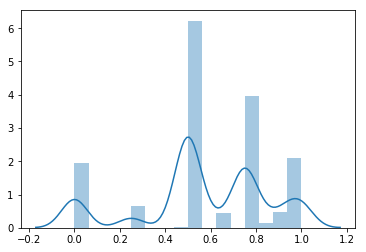

In [911]:
sns.distplot([c._metrics['stab_min_bound'] for c in fm_pos.get_concepts() if len(c.get_extent())>0])

In [1334]:
fm_pos.construct_lattice()

In [1423]:
calc_new_ngramms(fm_pos)

In [1531]:
#all_cncpts = fm_pos.get_concepts()
#stab_cncpts = [c for c in fm_pos.get_concepts() if fcai.get_not_none(c._metrics['stab_min_bound'],-1)>=0.0]
#stab_cncpts = [c for c in fm_pos.get_concepts() if fcai.get_not_none(c._metrics['log_stab_min_bound'],-1)>=50]
stab_cncpts = [c for c in fm_pos.get_concepts() if fcai.get_not_none(c._metrics['lstab_min_bound'],-1)>=20]
strong_stab_cncpts = [c for c in stab_cncpts if c._metrics['strongness']>=0.66]

print('n_stab_cncpts', len(stab_cncpts))
x = len(fm_pos.calc_cover_of_concepts(stab_cncpts))
print('cover of stab cncpts', x, x/len(txt_cntx_pos.get_objs()) )
print('n strong stab cncpts', len(strong_stab_cncpts))
x = len(fm_pos.calc_cover_of_concepts(strong_stab_cncpts))
print('cover of strong stab cncpts', x, x/len(txt_cntx_pos.get_objs()))

n_stab_cncpts 17
cover of stab cncpts 512 1.009861932938856
n strong stab cncpts 3
cover of strong stab cncpts 72 0.14201183431952663


In [1337]:
sch = fm_pos.select_smallest_covering_hyps(strong_stab_cncpts)
len(sch)

3

In [1367]:
for c in sch:
    print('PatterStructure', c.get_id())
    print('n objs:', len(c.get_extent()), 'examples:', c.get_extent()[:5])
    print('intent:', c.get_intent()['text'])
    print(f'confidence: {c._metrics["y_true_mean"]:.1%}')
    print('last added:', c._new_attrs)
    print('========================')

PatterStructure 14
n objs: 33 examples: ['5364', '5067', '3203', '9630', '3204']
intent: ('is', 'that', 's', 'the', 'of', 'and', 'a', 'today')
confidence: 80.5%
last added: ()
PatterStructure 19
n objs: 24 examples: ['4789', '12428', '1306', '991', '9068']
intent: ('is', 'that', 'in', 'him', 'as', 'and', 'hi', 'a', 'live', 'to')
confidence: 66.7%
last added: ('is', 'that', 'in', 'him', 'as', 'hi', 'a', 'live', 'to')
PatterStructure 17
n objs: 27 examples: ['5567', '3111', '1306', '991', '6301']
intent: ('is', 'befor', 'in', 'movi', 's', 'the', 'wa', 'it', 'but', 'of', 'as', 'film', 'and', 'a', 'to')
confidence: 67.5%
last added: ('befor', 'in', 'movi', 's', 'wa', 'it', 'but', 'of', 'as', 'film', 'a', 'to')


In [1538]:
#all_cncpts = fm_pos.get_concepts()
stab_cncpts = [c for c in fm_pos.get_concepts() if fcai.get_not_none(c._metrics['stab_min_bound'],-1)>=0.5]
strong_stab_cncpts = [c for c in stab_cncpts if c._metrics['strongness']>=0.8]

print('n_stab_cncpts', len(stab_cncpts))
x = len(fm_pos.calc_cover_of_concepts(stab_cncpts))
print('cover of stab cncpts', x, x/len(txt_cntx_pos.get_objs()) )
print('n strong stab cncpts', len(strong_stab_cncpts))
x = len(fm_pos.calc_cover_of_concepts(strong_stab_cncpts))
print('cover of strong stab cncpts', x, x/len(txt_cntx_pos.get_objs()))

n_stab_cncpts 410
cover of stab cncpts 513 1.0118343195266273
n strong stab cncpts 383
cover of strong stab cncpts 513 1.0118343195266273


In [1656]:
ds.loc[9630]['text']

'I just love Malle\'s documentaries. They are so effortless and simple but still so fascinating. I have no idea why this documentary works. It is about Glencoe, Minnesota. 5000 people live there and nothing happens, really. But still Malle manages to make it fascinating and interesting. His love for humanity, even racist or homophobic people, is so overwhelming that you just can\'t help but also to fall in love with them too. <br /><br />Malle filmed most of it in 1979. He came back 6 years later to see what had changed. This would have been a good film without the material 6 years later but this small addition makes it great. It may sound like Malle was just doing what has been done in the Up series but in fact it is not. The Up series are about people. Malle\'s emphasis is not so much on what happened to each person but what has happened to this community. And the change is great. 1985 is the Reagan era and the farmers are suffering. Once a proud community, now no one sees much futur

In [1536]:
fm_pos_stab = fcai.FormalManager(txt_cntx_pos, context_full=txt_cntx_full)
fm_pos_stab._concepts = [fcai.PatternStructure(c.get_extent(), c.get_intent().copy())
                         for c in  stab_cncpts #strong_stab_cncpts
                        ]+[fm_pos.get_bottom_concept(),fm_pos.get_top_concept()]#, 
for idx, c in enumerate(fm_pos_stab.sort_concepts(fm_pos_stab.get_concepts())):
    c._idx = idx

In [1537]:
fm_pos_stab.construct_lattice()
fm_pos_stab.calc_strongness()
fm_pos_stab.calc_stability_approx()

ZeroDivisionError: division by zero

In [1372]:
fig = fm_pos_stab.get_plotly_fig(color_by='strongness')

In [1373]:
fig

In [1397]:
def predict_by_text(txt, concepts, use_tqdm=False):
    cncpts_to_check = sorted(concepts, key=lambda c: len(c.get_extent()))
    #print(len(cncpts_to_check))
    cncpts_to_pred = []
    for i in tqdm(range(len(cncpts_to_check)), disable=not use_tqdm):
        #print(i)
        if len(cncpts_to_check)==0:
            break
            
        c = cncpts_to_check.pop(0)
        if c.get_intent() is None:
            continue
        #print(c)
        ptrns = c.get_intent()['text']
        for ptrn in ptrns:
            ptrn = tuple(ptrn.split(' '))
            ngrms = ngrams(txt.split(' '), len(ptrn))
            for ngrm in ngrms:
                #print(ngrm, ptrn)
                if ngrm==ptrn:
                    break
            else:
                # no ngram found
                break
        else:
            # all patterns found
            cncpts_to_pred.append(c)
            cncpts_to_check = [c_ for c_ in cncpts_to_check if not c.is_subconcept_of(c_)]
            
    pred = np.mean([c._metrics['y_true_mean'] for c in cncpts_to_pred])
    return pred, cncpts_to_pred

In [1384]:
txt = 'this movie is the best of awesome !!'
txt = ' '.join([porter.stem(x) for x in re.findall('\w+|\!+|\?+', txt)])
txt

'thi movi is the best of awesom !!'

In [1389]:
fm_pos_stab.get_concept_by_id(63)

PatternStructure 63
level: 2
extent (len: 4): 11720, 888, 10809, 2635
intent (len: 1): text in [s, young, in, the, of, thi, but, ha, it, could, with, to, town, some, on, friend, film, or, a, "br br"]
new extent (len: 4): 10809, 2635, 888, 11720
new_intent (len: 20): s, young, in, the, of, thi, but, ha, it, could, with, to, town, some, on, friend, film, or, a, br br
lower neighbours (len: 1): 411
upper neighbours (len: 1): 1
metric strongness = 1.0
metric stab_min_bound = 0.9375
metric stab_max_bound = 0.9375
metric log_stab_min_bound = 4.0
metric log_stab_max_bound = 4.0
metric lstab_min_bound = 3.0
metric y_true_mean = 1.0

In [1390]:
txt = "s young in the of thi but ha it could with to town some on friend film or a br br"
txt

's young in the of thi but ha it could with to town some on friend film or a br br'

In [1391]:
pred, cncpts_to_pred = predict_by_text(txt, fm_pos_stab.get_concepts())

In [1392]:
len(cncpts_to_pred)

1

In [1393]:
pred

1.0

In [1388]:
cncpts_to_pred[0].get_intent()

{'text': ('is', 'the')}

In [1395]:
train_ds.columns

Index(['sentiment', 'text', 'bert_0', 'bert_1', 'bert_2', 'bert_3', 'bert_4',
       'bert_5', 'bert_6', 'bert_7',
       ...
       'bert_761', 'bert_762', 'bert_763', 'bert_764', 'bert_765', 'bert_766',
       'bert_767', 'sentiment_bin', 'prediction', 'text_lemmatized'],
      dtype='object', length=773)

In [1398]:
preds = []
for txt in tqdm(train_ds['text_lemmatized']):
    pred = predict_by_text(txt, fm_pos_stab.get_concepts())[0]
    preds.append(pred)

In [1400]:
train_ds['preds_fca'] = preds

In [1402]:
train_ds.head()

,sentiment,text,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,...,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,sentiment_bin,prediction,text_lemmatized,preds_fca
11430,pos,"The plot is real horrific, the atmosphere real...",-0.189058,-0.021032,0.309890,0.068262,0.269867,0.036502,0.047995,0.652493,...,-0.435642,-0.049571,0.176640,-0.262599,0.300807,-0.028136,True,False,the plot is real horrif the atmospher realli d...,1.000000
8037,pos,This show has all the typical characters in a ...,-0.064614,-0.125271,0.302658,-0.050703,0.204251,0.000791,0.129794,0.895352,...,-0.318503,-0.100321,0.249949,-0.175311,0.405152,0.126652,True,False,thi show ha all the typic charact in a comedi ...,0.822222
21159,neg,"OK, so it was written in 1996, before 9/11, so...",0.116933,-0.093407,0.106108,0.117611,0.272360,-0.042555,0.014732,0.710308,...,-0.181459,-0.142479,0.155485,-0.102440,0.242626,0.106329,False,False,ok so it wa written in 1996 befor 9 11 so you ...,0.548930
22418,neg,"I'll keep this short, as I know I don't need t...",0.008450,-0.021725,0.197943,-0.070340,0.048153,0.010873,-0.029075,0.657723,...,-0.184895,-0.190218,0.288340,0.093233,0.229441,0.036030,False,False,i ll keep thi short as i know i don t need to ...,0.608151
20493,neg,A routine mystery/thriller concerning a killer...,-0.007284,-0.140563,0.313403,0.101133,0.517301,-0.166775,0.310924,0.902804,...,-0.269488,-0.340005,0.332582,-0.131802,0.498638,-0.215434,False,True,a routin mysteri thriller concern a killer tha...,0.518557


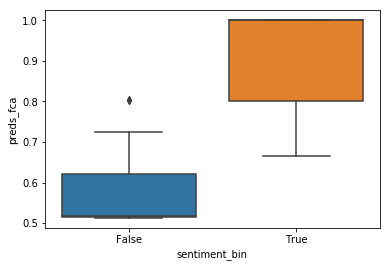

In [1403]:
sns.boxplot(x='sentiment_bin', y='preds_fca', data=train_ds)

In [1404]:
train_ds.columns

Index(['sentiment', 'text', 'bert_0', 'bert_1', 'bert_2', 'bert_3', 'bert_4',
       'bert_5', 'bert_6', 'bert_7',
       ...
       'bert_762', 'bert_763', 'bert_764', 'bert_765', 'bert_766', 'bert_767',
       'sentiment_bin', 'prediction', 'text_lemmatized', 'preds_fca'],
      dtype='object', length=774)

In [1426]:
def drop_objects_from_concepts(gs, concepts, cntx_full):
    new_exts = []
    for c in concepts:
        ext_ = tuple([g for g in c.get_extent() if g not in gs])
        new_exts.append(ext_)
    new_exts = list(set(new_exts))
    new_concepts = []
    for ext_ in new_exts:
        int_ = cntx_full.get_intent(ext_)
        c = fcai.PatternStructure(ext_, int_)
        new_concepts.append(c)
    return new_concepts

In [1446]:
gs_to_drop = list(train_ds.index[:5])

In [1444]:
concepts_dropped = drop_objects_from_concepts(gs_to_drop, fm_pos_stab.get_concepts(), txt_cntx_full)

In [ ]:
txt_cntx_pos = pattern_structure.TextContext(
    train_ds[train_ds['sentiment_bin']][['text_lemmatized']].values[:20], 
    objs=train_ds[train_ds['sentiment_bin']].index[:20],
    attrs=['text'],
    cat_attrs=[])

In [1450]:
txt_cntx_full_dropped = pattern_structure.TextContext(
    train_ds.drop(gs_to_drop)[['text_lemmatized']],
    objs=train_ds.drop(gs_to_drop).index,
    attrs=['text'],
    cat_attrs=[],
)

txt_cntx_dropped = pattern_structure.TextContext(
    train_ds.drop(gs_to_drop)[train_ds.drop(gs_to_drop)['sentiment_bin']][['text_lemmatized']],
    objs=train_ds.drop(gs_to_drop)[train_ds.drop(gs_to_drop)['sentiment_bin']].index,
    attrs=['text'],
    cat_attrs=[],
)

In [1453]:
fm_dropped = fcai.FormalManager(txt_cntx_dropped, context_full=txt_cntx_full_dropped)
fm_dropped._concepts = concepts_dropped
for idx, c in enumerate(fm_dropped.sort_concepts(fm_dropped.get_concepts())):
    c._idx = idx
fm_dropped.construct_lattice()
calc_y_true_mean(fm_dropped.get_concepts(), txt_cntx_full_dropped, train_ds, use_tqdm=True)

In [1647]:
fig = fm_dropped.get_plotly_fig(color_by='y_true_mean')

In [1648]:
fig

In [1464]:
preds_short = []
for g in gs_to_drop:
    pred = predict_by_text(train_ds.loc[g,['text_lemmatized']].values[0], fm_dropped.get_concepts() )[0]
    preds_short.append(pred)

In [1465]:
preds_short

[0.6773592768987128,
 0.6417910447761194,
 0.5537637712807352,
 0.6164500595453839,
 0.5191709844559586]

In [1466]:
preds_short = []
for g in gs_to_drop:
    pred = predict_by_text(train_ds.loc[g,['text_lemmatized']].values[0], fm_pos_stab.get_concepts() )[0]
    preds_short.append(pred)

In [1467]:
preds_short

[1.0,
 0.8222222222222222,
 0.5489301594755721,
 0.608151023288638,
 0.5185567010309279]

In [1567]:
from sklearn.linear_model import LogisticRegression

In [1569]:
bert_feats = [f for f in train_ds.columns if f.startswith('bert_')]
len(bert_feats)

768

In [1571]:
lr = LogisticRegression()
lr.fit(train_ds[bert_feats], train_ds['sentiment_bin'])

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1574]:
test_ds['sentiment_bert'] = lr.predict(test_ds[bert_feats])

In [1576]:
test_ds.columns

Index(['sentiment', 'text', 'bert_0', 'bert_1', 'bert_2', 'bert_3', 'bert_4',
       'bert_5', 'bert_6', 'bert_7',
       ...
       'bert_762', 'bert_763', 'bert_764', 'bert_765', 'bert_766', 'bert_767',
       'sentiment_bin', 'prediction', 'text_lemmatized', 'sentiment_bert'],
      dtype='object', length=774)

In [1630]:
preds_fca = []
for txt in tqdm(test_ds['text_lemmatized']):
    preds_fca.append(predict_by_text(txt, [c for c in fm_pos.get_concepts() if c._metrics['strongness']>0.52])[0])

In [1631]:
test_ds['sentiment_fca_prob'] = preds_fca
test_ds['sentiment_fca_prob'] = test_ds['sentiment_fca_prob'].fillna(0)

In [1639]:
import matplotlib.pyplot as plt

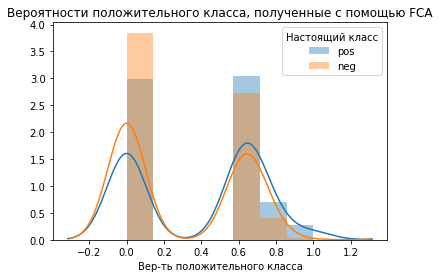

In [1646]:
for v in test_ds['sentiment'].unique():
    sns.distplot(test_ds[test_ds['sentiment']==v]['sentiment_fca_prob'], label=f'{v}')
plt.legend(title='Настоящий класс')
plt.xlabel('Вер-ть положительного класса')
plt.title('Вероятности положительного класса, полученные с помощью FCA')
plt.show()

In [1633]:
test_ds['sentiment_fca'] = test_ds['sentiment_fca_prob']>0.5
accuracy_score(test_ds['sentiment_bin'], test_ds['sentiment_fca'])

0.562

In [1634]:
from sklearn.metrics import accuracy_score

In [1635]:
accuracy_score(test_ds['sentiment_bin'], test_ds['sentiment_bert'])

0.866

In [1658]:
test_ds['sentiment_bin'].mean()

0.507

383

In [ ]:
sns.box

In [1577]:
test_ds['text_lemmatized']

8853     as i saw the movi i wa realli shock to see wha...
13186    first let me just comment on what i like about...
24205    nice attempt and good idea redempt of the pros...
10468    i realli love thi version of emma the best kat...
9768     love thi show smart act smart dialog great sto...
12067    quit simpli the best realiti show ever made th...
7352     excel documentari ostens about the friendship ...
15066    i realiz that live in the western plain of wyo...
18278    welcom to our town welcom to your town ? as we...
19179    i m surpris about the mani femal voter who eve...
22135    what a disappoint ! i hate the mummi but thi o...
21942    well thi wa not a surpris mani peopl will tell...
4871     although thi film put davi on the map due to h...
6555     classic highli influenti low budget thriller t...
17184    i gave thi movi a 2 and though i consid myself...
22197    with a movi call gaynigg from outer space how ...
12187    ye thi product is long good news for bront fan.